# ADA final exam (Fall 2023)

This exam consists of 2 parts. Parts are independent from each other.

## Dataset


"Friends" is an American television sitcom that originally aired on NBC from September 22, 1994, to May 6, 2004. Created by David Crane and Marta Kauffman, the show gained immense popularity and has since become a classic in the world of television. The series is set in New York City and revolves around a group of six friends: Ross Geller (David Schwimmer), Rachel Green (Jennifer Aniston), Monica Geller (Courteney Cox), Chandler Bing (Matthew Perry), Joey Tribbiani (Matt LeBlanc), and Phoebe Buffay (Lisa Kudrow). The show explores their personal and professional lives as they navigate the ups and downs of relationships, careers, and the challenges of adulthood.

In this exam, we will use a dataset containing all the conversations that occurred over 10 seasons of Friends. We refer to each row in the dataset as an 'utterance." The data format of the dataset is as follows

- id: `<str>`, the index of the utterance in the format sAA_eBB_cCC_uDDD, where AA is the season number, BB is the episode number, CC is the scene/conversation number, and DDD is the number of the utterance in the scene (e.g. s01_e18_c05_u021).
- speaker: `<str>`, the speaker who made the utterance, e.g. Monica Geller
- conversation_id: `<str>`, the id of the first utterance in the conversation this utterance belongs. We assume conversations begin at the start of a new scene.
- reply_to: `<str>`, the id of the utterance to which this utterance replies. None if the utterance is the first in a conversation.
- text: `<str>`, the textual content of the utterance.


In [1]:
# First, let's import some required libraries!
import statsmodels.formula.api as smf
import pandas as pd
from collections import Counter
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np


## Part 1: The one where you find the protagonist (60 pts)

A big debate among Friends fans is: who is the show's main character? In this task, your goal is to provide a data-driven answer to this question.


--- 

**1.1 —** Load the data from the jsonl file `exam1.jsonl` into a pandas dataframe. Then
 
 A. Calculate and display the number of distinct speakers in the dataframe.
 
 B. Calculate and display the number of conversations (see `conversation_id`).
 
 C. Remove all utterances from the dataframe where the `speaker` is "TRANSCRIPT_NOTE" or "#ALL#". Print the number of rows in the dataframe.
 
 D. Create additional columns corresponding to the season (`season`, e.g., season 1 should contain `s01`) and the episode (`episode`, e.g., episode 5 of season 4 should contain `s04_e05`) of each utterance. Print the season and the episode associated with utterance `s10_e18_c11_u019`.
 
 E. Create an additional column corresponding to the length of each utterance in terms of the number of characters (`length`). Print the length associated with utterance `s10_e18_c11_u019`.


In [2]:
df = pd.read_json("data/exam1.jsonl", lines=True)

In [3]:
df.head()

,id,conversation_id,text,speaker,reply-to
0,s01_e01_c01_u001,s01_e01_c01_u001,There's nothing to tell! He's just some guy I ...,Monica Geller,None
1,s01_e01_c01_u002,s01_e01_c01_u001,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01_e01_c01_u001
2,s01_e01_c01_u003,s01_e01_c01_u001,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01_e01_c01_u002
3,s01_e01_c01_u004,s01_e01_c01_u001,"Wait, does he eat chalk?",Phoebe Buffay,s01_e01_c01_u003
4,s01_e01_c01_u005,s01_e01_c01_u001,,TRANSCRIPT_NOTE,s01_e01_c01_u004


In [4]:
#A
unique_speakers = df.speaker.unique()
print(len(unique_speakers))

700


In [5]:
#B
print(len(df.conversation_id.unique()))

3107


In [6]:
#C
df.drop(df.loc[df["speaker"].isin(["TRANSCRIPT_NOTE", "#ALL#"]), :].index, inplace=True)
len(df)

60985

In [7]:
#D
df["season"] = df["id"].apply(lambda str: str[:3])
df["episode"] = df["id"].apply(lambda str: str[:7])

In [8]:
df.loc[df["id"] == "s10_e18_c11_u019", ["id", "season", "episode"]]

,id,season,episode
67370,s10_e18_c11_u019,s10,s10_e18


In [9]:
#E
df["length"] = df["text"].apply(lambda text: len(text))

In [10]:
df.loc[df["id"] == "s10_e18_c11_u019", ["id", "text", "length"]]

,id,text,length
67370,s10_e18_c11_u019,We got some time.,17


**1.2** Next, you conduct some basic analyses:

 A. With `statsmodels`, fit a linear regression `length ~ C(season, Treatment(reference="s01"))`, where length is an integer and season is a categorical variable. Print the regression summary.
 
 B. /**Discuss:/** Considering the regression summary:
   - What does the intercept in this regression represent? 
   - What does the coefficient `C(season, Treatment(reference="s01"))[T.s09]` represent? 
   - Does the average utterance in season 9 contain significantly more characters than in season 1 at the 0.05 significance level? Justify with the regression summary **only**. 
   - Does the average utterance in season 10 contain significantly more characters than in season 1 at the 0.05 significance level? Justify with the regression summary  **only** .

 C. Argue visually (i.e., with a plot) that there are 6 main characters in the show.

In [11]:
res = smf.ols("length ~ C(season, Treatment(reference='s01'))", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.058
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           4.96e-12
Time:                        16:11:49   Log-Likelihood:            -3.2981e+05
No. Observations:               60985   AIC:                         6.596e+05
Df Residuals:                   60975   BIC:                         6.597e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**B** 

- The intercept of this regression represents the mean length of the reference for the entire dataframe so for the season 1. In average a line of dialogue in season 1 is 45.5 characters long.
- The coeficient `C(season, Treatment(reference="s01"))[T.s09]` used for the regression is the seasob of each dialogue, so we are looking at the relation between the season and the length of each text. The `Treatment(reference="s01")` is there to indicate the reference for the regression here s01 and its mean behaviour is represented by the intercept. 
- Yes on average there is 6.1 more characters in the texts of the season 9 than in the season 1.
We can see that with the coeficient given for season 9. Also this result is significant since the P-value is 0.000 which is below 5% (0.05).
- The average utterance in season 10 is on average 0.85 characters shorter than in season 1, we see that with the coeficient of S10. But the P value is this time bigger than the 5% thershold (0.409) and so this result is not significant 


[]

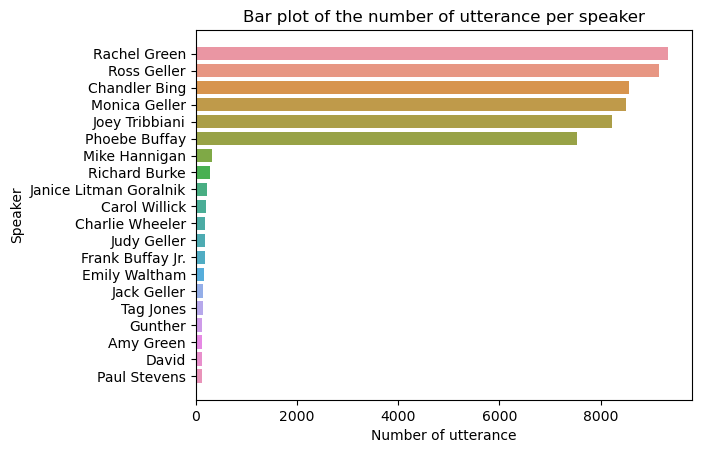

In [12]:
values_count = df["speaker"].value_counts()[:20] #We only take the biggest 10 speackers for visibility 
ax = sns.barplot(x= values_count.values, y= values_count.index, orient="h")
plt.title("Bar plot of the number of utterance per speaker")
ax.set(xlabel= "Number of utterance", ylabel="Speaker")
plt.plot()


**C** We clearely see in this graph that there is 6 main characters in "Friends"

--- 
**1.3 —** Using `networkx` 

A. Create a `MultiDiGraph` (directed graph with self loops and parallel edges) where:
- Each node $u$ is a character uniquely identified by the `speaker` field.
- There is an edge between nodes $u$ and $v$ if $u$ replied to $v$. If an utterance (a row in the dataframe) is said in reply to nobody, then it will not correspond to an edge. Each edge should contain two attributes. Each edge should have two attributes: `season` and `episode`.

B. Print the number of nodes and edges in your graph.

C. **/Discuss:/** Instead of using multi-edges, what would be another way in which you could capture the number of replies associated with each node pair?


In [13]:
df.head()

,id,conversation_id,text,speaker,reply-to,season,episode,length
0,s01_e01_c01_u001,s01_e01_c01_u001,There's nothing to tell! He's just some guy I ...,Monica Geller,None,s01,s01_e01,56
1,s01_e01_c01_u002,s01_e01_c01_u001,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01_e01_c01_u001,s01,s01_e01,80
2,s01_e01_c01_u003,s01_e01_c01_u001,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01_e01_c01_u002,s01,s01_e01,72
3,s01_e01_c01_u004,s01_e01_c01_u001,"Wait, does he eat chalk?",Phoebe Buffay,s01_e01_c01_u003,s01,s01_e01,24
5,s01_e01_c01_u006,s01_e01_c01_u001,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01_e01_c01_u005,s01,s01_e01,79


In [30]:
#A
G = nx.MultiDiGraph()
df_temp = df.set_index("id", inplace= False)
for index, row in df.iterrows():
    if row["reply-to"] is not None:
        try:
            replied_to = df_temp.loc[row["reply-to"]].speaker
            G.add_edge(u_for_edge= row["speaker"], v_for_edge= replied_to, season=row["season"], episode=row["episode"])
        except:
            pass

In [31]:
#B
print(G.number_of_nodes(), G.number_of_edges())

692 54904


**C** We could put a 3rd attribute at each edge between people counting the number of replies. It could be named "weight" for example. 

---
With the graph ready, you set out to investigate who is the true protagonist of Friends.

Ignore the graph you generated previously and instead use the graph provided in `exam2.graphml`. Note that this graph may be slightly different from what you generated, but treat it as the ground truth. We provide you with code to load the graph below.


In [35]:
import networkx as nx

G = nx.read_graphml("./data/exam2.graphml")

---

**1.4 —** Using the provided MultiDiGraph $G$:

A. Calculate the out-degree of each node (also known as out-degree centrality). Please do not use the `nx.out_degree_centrality` function here, as it normalizes the degree. (E.g., if a node has 5 outgoing edges, it should have out-degree 5 according to your code.)

B. Calculate the PageRank centrality of each node in $G$. Use the default parameters.

C. Print both centrality metrics calculated above for the six main characters of Friends.

D. **/Discuss:/** According to the metrics, who is the most important character in Friends?

In [42]:
out_degrees = dict(G.out_degree)
print(out_degrees)


{'Joey Tribbiani': 7395, 'Monica Geller': 7621, 'Chandler Bing': 7702, 'Phoebe Buffay': 6797, 'Ross Geller': 8234, 'Rachel Green': 8470, 'Waitress': 6, 'Paul the Wine Guy': 14, 'Priest On Tv': 0, 'Franny': 6, 'Customer': 12, 'Marsha': 4, 'Carol Willick': 183, 'Judy Geller': 154, 'Susan Bunch': 94, 'Barry Farber': 35, 'Robbie': 4, 'Bernice': 3, 'Dr. Oberman': 3, 'Paula': 6, 'Alan': 4, 'The Guys': 9, 'Lizzy': 10, 'Leslie': 17, 'Guys': 4, 'Kiki': 4, 'Joanne': 5, 'Receptionist': 30, 'Pizza Guy': 8, 'Both': 15, 'Kid': 7, 'Angela Delveccio': 10, 'Janice Litman Goralnik': 189, 'Woman': 89, 'Bob': 7, 'Aurora': 28, 'Director': 49, 'Jill Goodacre': 8, 'Mr. Heckles': 31, 'Paolo': 18, 'Shelley': 11, 'Aunt Lillian': 8, 'Nurse Sizemore': 12, 'Andrea': 2, 'Lowell': 7, 'Terry': 18, 'Guy': 54, 'Girl': 23, 'Max': 12, 'David': 116, 'Sandy': 29, 'Bobby Rush': 28, 'Dick Clark': 2, 'Jay Leno': 4, 'Nora Tyler Bing': 32, 'Coma Guy': 7, "Phoebe's Assistant": 1, 'Roger': 24, 'Joey Tribbiani Sr.': 19, 'Ronni Rap

In [41]:
pagerank = nx.pagerank(G)
print(pagerank)

{'Joey Tribbiani': 0.11283519639878972, 'Monica Geller': 0.1134500759232524, 'Chandler Bing': 0.1145352324808736, 'Phoebe Buffay': 0.10206929426008514, 'Ross Geller': 0.12561115738701217, 'Rachel Green': 0.12684259753919158, 'Waitress': 0.0003062074066644528, 'Paul the Wine Guy': 0.00044553270156488567, 'Priest On Tv': 0.00024224564880034354, 'Franny': 0.00029277367765869703, 'Customer': 0.0004845752401603149, 'Marsha': 0.0002684196840180484, 'Carol Willick': 0.002690327530697601, 'Judy Geller': 0.002515060201491984, 'Susan Bunch': 0.001468496313041046, 'Barry Farber': 0.0008987249308190228, 'Robbie': 0.0002859034534336162, 'Bernice': 0.0002950081973502544, 'Dr. Oberman': 0.00026801595849931705, 'Paula': 0.00029277367765869703, 'Alan': 0.0002677907275840713, 'The Guys': 0.0003569457319822747, 'Lizzy': 0.00035716350819903187, 'Leslie': 0.0004211840525556916, 'Guys': 0.0002773144535313947, 'Kiki': 0.0003776419862813504, 'Joanne': 0.0003606610766269474, 'Receptionist': 0.00075618628152497

In [45]:
main_characters = ["Joey Tribbiani", "Monica Geller", "Chandler Bing", "Phoebe Buffay", "Ross Geller", "Rachel Green"]
for character in main_characters:
    print(f"{character} has an out-degree of {out_degrees[character]} and a pagerank of {round(pagerank[character], 5)}")

Joey Tribbiani has an out-degree of 7395 and a pagerank of 0.11284
Monica Geller has an out-degree of 7621 and a pagerank of 0.11345
Chandler Bing has an out-degree of 7702 and a pagerank of 0.11454
Phoebe Buffay has an out-degree of 6797 and a pagerank of 0.10207
Ross Geller has an out-degree of 8234 and a pagerank of 0.12561
Rachel Green has an out-degree of 8470 and a pagerank of 0.12684


---

**1.5 —** **/True or false:/** Considering your answer in **1.4**, are the following statements true or false? Justify your answers. 

A. "If we inverted all  edges in the graph such that an edge $(u,v)$ becomes an edge $(v,u)$, the PageRank centrality would remain unchanged."

B. "If we removed all outgoing edges from Rachel Green, her PageRank centrality would remain unchanged."

C. "If a new node was introduced in the graph, with 1,000 outgoing edges towards each other node, but no incoming edge, it would have the highest PageRank centrality."


A. False, a node has higer pagerank if it is pointed by important nodes so if you revert every edges the pagerank will change. 

B. False, since Rachel is pointing at some people whom are also pointing at her then when deleting her outgoing edges you will reduce the importance of the nodes she was pointing at. This will cause to reduce the importance of rachel, since in pagerank you are more important the more the people pointing at you are important.

C. False. Again pagerank centrality depends on who is pointing at you. Since nobody is pointing at this new node its pagerank centrality will be close to 0.


---

**1.6 —** Next, you consider how these centrality metrics vary over the course of the seasons.

A. Calculate the PageRank and out-degree centrality of the 6 main characters per episode, i.e., for each episode, create a graph containing only the utterances of that episode and calculate the PageRank centrality for this new graph. Print the PageRank and the out-degree of Rachel Green for the first episode of the first season.

B. Considering the episode-level out-degree centrality of Phoebe Buffay in season 1 and in season 10, print the mean and the standard error of the mean.

C. Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels, containing the average PageRank centrality per season of Rachel Green and Ross Geller (Panel A), and the average out-degree per season of Rachel Green and Ross Geller (Panel B). Show 95% confidence intervals in your plot (calculated over the episodes in each season).

D. **/Discuss:/** Does the plot support the hypothesis that Rachel was the show's protagonist in all 10 seasons? Explain why.

In [67]:
all_episodes = df.episode.unique()
print(len(all_episodes))

236


In [64]:
# A
edge_episode = nx.get_edge_attributes(G, 'episode')
dict_edges_per_episode = {}

for edge in edge_episode:
    episode = edge_episode[edge]
    if episode in dict_edges_per_episode.keys():
        dict_edges_per_episode[episode].append(edge)
    else:
        dict_edges_per_episode[episode] = [edge]

In [72]:
dict_main_character = {}
for character in main_characters:
    dict_main_character[character] = {}

for episode in all_episodes:

    subgraph = G.edge_subgraph(dict_edges_per_episode[episode])
    sub_out_degrees = dict(subgraph.out_degree)
    sub_pagerank = nx.pagerank(subgraph)


    for character in main_characters:
        dict_main_character[character][episode] = {"out_degree": sub_out_degrees[character],
                                                    "pagerank": sub_pagerank[character]}

In [75]:
# A
print(dict_main_character["Rachel Green"]["s01_e01"])

{'out_degree': 43, 'pagerank': 0.15312202321195537}


In [85]:
# B 
dict_all_episode_each_season = {}
for episode in all_episodes:
    try:
        dict_all_episode_each_season[episode[0:3]].append(episode)
    except:
        dict_all_episode_each_season[episode[0:3]] = [episode]

In [84]:
import scipy.stats as stats

list_out_degree_s01 = []
for episode in dict_all_episode_each_season["s01"]:
    list_out_degree_s01.append(dict_main_character["Phoebe Buffay"][episode]["out_degree"])

list_out_degree_s10 = []
for episode in dict_all_episode_each_season["s10"]:
    list_out_degree_s10.append(dict_main_character["Phoebe Buffay"][episode]["out_degree"])

print("Season 1 ", np.mean(list_out_degree_s01), stats.sem(list_out_degree_s01))
print("Season 10 ", np.mean(list_out_degree_s10), stats.sem(list_out_degree_s10))


Season 1  23.333333333333332 2.200680614964863
Season 10  36.94444444444444 2.8092659732823404


In [142]:
#C
means_pagerank = []
confidence_intervals_pageranks_low = []
confidence_intervals_pageranks_high = []

means_degree = []
confidence_intervals_degree_low = []
confidence_intervals_degree_high = []

for key in dict_all_episode_each_season:
    vals_of_season_pagerank = [] 
    vals_of_season_degree = []
    for episode in dict_all_episode_each_season[key]:
        vals_of_season_pagerank.append(dict_main_character["Rachel Green"][episode]["pagerank"])
        vals_of_season_degree.append(dict_main_character["Rachel Green"][episode]["out_degree"])
        
    means_pagerank.append(np.mean(vals_of_season_pagerank))
    interval = stats.t.interval(0.95, len(vals_of_season_pagerank)-1, loc=np.mean(vals_of_season_pagerank), scale=stats.sem(vals_of_season_pagerank))
    confidence_intervals_pageranks_low.append(interval[0])
    confidence_intervals_pageranks_high.append(interval[1])

    means_degree.append(np.mean(vals_of_season_degree))
    interval = stats.t.interval(0.95, len(vals_of_season_degree)-1, loc=np.mean(vals_of_season_degree), scale=stats.sem(vals_of_season_degree))
    confidence_intervals_degree_low.append(interval[0])
    confidence_intervals_degree_high.append(interval[1])

means_pagerank = np.array(means_pagerank)
confidence_intervals_pageranks_low = np.array(confidence_intervals_pageranks_low)
confidence_intervals_pageranks_high = np.array(confidence_intervals_pageranks_high)

means_degree = np.array(means_degree)
confidence_intervals_degree_low = np.array(confidence_intervals_degree_low)
confidence_intervals_degree_high = np.array(confidence_intervals_degree_high)

In [140]:
means_pagerank_Phoebe = []
confidence_intervals_pageranks_low_Phoebe = []
confidence_intervals_pageranks_high_Phoebe = []

means_degree_Phoebe = []
confidence_intervals_degree_low_Phoebe = []
confidence_intervals_degree_high_Phoebe = []

for key in dict_all_episode_each_season:
    vals_of_season_pagerank = [] 
    vals_of_season_degree = []
    for episode in dict_all_episode_each_season[key]:
        vals_of_season_pagerank.append(dict_main_character["Phoebe Buffay"][episode]["pagerank"])
        vals_of_season_degree.append(dict_main_character["Phoebe Buffay"][episode]["out_degree"])
        
    means_pagerank_Phoebe.append(np.mean(vals_of_season_pagerank))
    interval = stats.t.interval(0.95, len(vals_of_season_pagerank)-1, loc=np.mean(vals_of_season_pagerank), scale=stats.sem(vals_of_season_pagerank))
    confidence_intervals_pageranks_low_Phoebe.append(interval[0])
    confidence_intervals_pageranks_high_Phoebe.append(interval[1])

    means_degree_Phoebe.append(np.mean(vals_of_season_degree))
    interval = stats.t.interval(0.95, len(vals_of_season_degree)-1, loc=np.mean(vals_of_season_degree), scale=stats.sem(vals_of_season_degree))
    confidence_intervals_degree_low_Phoebe.append(interval[0])
    confidence_intervals_degree_high_Phoebe.append(interval[1])

means_pagerank_Phoebe = np.array(means_pagerank_Phoebe)
confidence_intervals_pageranks_low_Phoebe = np.array(confidence_intervals_pageranks_low_Phoebe)
confidence_intervals_pageranks_high_Phoebe = np.array(confidence_intervals_pageranks_high_Phoebe)

means_degree_Phoebe = np.array(means_degree_Phoebe)
confidence_intervals_degree_low_Phoebe = np.array(confidence_intervals_degree_low_Phoebe)
confidence_intervals_degree_high_Phoebe = np.array(confidence_intervals_degree_high_Phoebe)

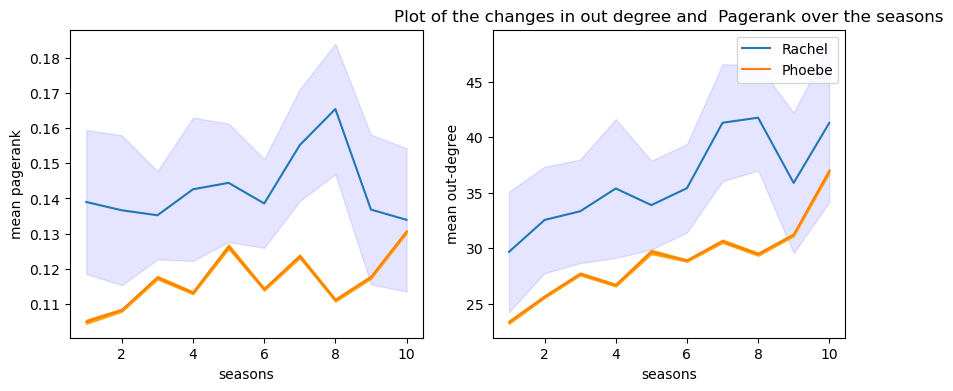

In [163]:
fig, ax = plt.subplots(1, 2, figsize= (10, 4))
ax[0].plot(list(range(1,11)), means_pagerank, label="Rachel")
ax[0].plot(list(range(1,11)), means_pagerank_Phoebe, label="Phoebe")
ax[0].fill_between(list(range(1,11)), (confidence_intervals_pageranks_low), (confidence_intervals_pageranks_high), color='b', alpha=.1)
ax[0].fill_between(list(range(1,11)), (confidence_intervals_pageranks_low_Phoebe), (confidence_intervals_pageranks_high_Phoebe), color='orange', alpha=1)


ax[1].plot(list(range(1,11)), means_degree, label="Rachel")
ax[1].fill_between(list(range(1,11)), (confidence_intervals_degree_low), (confidence_intervals_degree_high), color='b', alpha=.1)
ax[1].plot(list(range(1,11)), means_degree_Phoebe, label="Phoebe")
ax[1].fill_between(list(range(1,11)), (confidence_intervals_degree_low_Phoebe), (confidence_intervals_degree_high_Phoebe), color='orange', alpha=1)

plt.title("Plot of the changes in out degree and  Pagerank over the seasons", loc="center")
ax[0].set(xlabel="seasons", ylabel="mean pagerank")
ax[1].set(xlabel="seasons",  ylabel="mean out-degree")
plt.legend()
plt.show()


---

**1.7 —** **/True or false:/** Considering your answer in **1.6** are the following statements true or false? Justify your answer. 


A. "In season 7, Rachel Green's episode-level PageRank and out-degree centrality are higher than Ross Geller's. This difference is statistically significant at the 0.05 significance level."

B. "Phoebe Buffay's out-degree grew between season 1 and season 10; this implies that other characters spoke less than her in season 10."

C. "Phoebe Buffay's PageRank was higher in season 10 than in season 1. This difference is statistically significant at the 0.05 significance level and suggests that the character gained importance over the course of the show."


A. True, you can see that in the plot that the two points in x = 7 in both graphs are not at the same place and they are not in each other confidence interval 

B. False. Not necessarly. Maybe there where juste more discussions at each new season. We also see that the out-degree of Rachel grew so it even more puts the doupt on this statement. 

C. True. Indeed, the Pagerank grew and it is significant at the 0.05 level since the point at season 10 and the point at season 1 are not in each others confidence interval. Also since pagerank is a metric for the importance of a node in a graph we can say that Phoeab gained importance over the course of the show

## Part 2: The one about text similarity (40 pts)

Next, you investigate how unique characters are by analyzing what they said throughout the 10 seasons.

**2.1 —** Load the dataframe `exam3.jsonl`. This dataframe is similar to `exam1.jsonl`, except:

- It has an additional column called `tokens`, containing a sentence list. Each sentence is another list composed of tokens, e.g.,
`[['There', "'s", 'nothing', 'to', 'tell', '!'], ['He', "'s", 'just', 'some', 'guy', 'I', 'work', 'with', '!']]`.
- It has an additional column called `episode` containing a unique episode identifier.
- It only contains utterances by Phoebe, Rachel, Ross, Joey, Monica, or Chandler (the main characters).
 
Given this dataframe, you will create an episode-level word-frequency matrix for Chandler Bing, one of the main characters.

A. Create a list $L$ containing all distinct tokens uttered by Chandler Bing throughout the 10 seasons, sorted in ascending order. Print the 10 first and last elements of the list. 

B. Create a matrix $X$ with $m$ rows and $n$ columns, where: $n$ is the number of tokens in the list $L$ that you just created, and $m$ is the number of episodes (236). Each position $X_{i,j}$ in this matrix should contain the number of times the character uttered the word $j$ in episode $i$. Print how many times Chandler uttered the token `joey` in the first episode of the first season, as well as the shape of the matrix $X$.

C. Transform the matrix $X$ into a TF-IDF matrix $T$, combining the following formula (as seen in class):

$$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th episode}$$

$$\text{IDF}(j) =  \log \frac{\text{number of episodes}}{\text{number of episodes in which the $j$-th word occurs}}$$

Print the value in the TF-IDF matrix corresponding to Chandler's utterance of the token `joey` in the first episode of the first season.

D. **/Discuss:/** Some of the tokens (e.g., `joey`) reference other characters. How may these tokens help a classifier predict which character uttered a sentence?

---
For the remainder of the task, you will use the TF-IDF matrix that we compute below. Note:
- This matrix was calculated in a slightly different way: it considers only the 1000 tokens with the highest term frequency.
- We provide three useful variables below (`X`, `y`, and `df_tfidf`). 
    - `X` is a matrix containing the TF-IDF values for the top 1000 tokens, where each row corresponds to a character in an episode. 
    - `y` indicates which character is responsible for the utterance. Each character has a corresponding number, e.g., 2 for Monica Geller; see dictionary below. 
    - `df_tfidf` is a dataframe combining `X` with other episode and utterance-level metadata.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_tfidf = pd.read_json("./data/exam3.jsonl", lines=True)[["speaker", "episode", "text"]]

vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df_tfidf.text).toarray()
print("X shape", X.shape)


map_char_to_int = {
'Chandler Bing': 0,
'Joey Tribbiani': 1,
'Monica Geller': 2,
'Phoebe Buffay': 3,
'Rachel Green': 4,
'Ross Geller': 5
}


y = df_tfidf.speaker.apply(lambda x: map_char_to_int[x]).values
print("y shape", y.shape)

df_tfidf = pd.concat([df_tfidf[["speaker", "episode"]],  pd.DataFrame(X)], axis=1)

df_tfidf.head(3)

X shape (51312, 1000)
y shape (51312,)


,speaker,episode,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,Monica Geller,s01_e01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Joey Tribbiani,s01_e01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Chandler Bing,s01_e01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


--- 

**2.2 —** To compare characters, carry out a classification task. Train a decision tree classifier to predict which main character uttered a sentence..

A. Split the dataset into training and test sets using sklearn `sklearn.model_selection.train_test_split` using parameters `test_size=0.3` and `random_state=42`, and using the default values for all other parameters.

B. Train a decision tree classifier (`sklearn.tree.DecisionTreeClassifier`) using `random_state=42`, leaving all other parameters as their default.

C. Compute the accuracy of your classifier and of a random baseline, i.e., a classifier that predicts a character uniformly at random. **/Discuss:/** Compare the two accuracies.


D. Compute the confusion matrix of your classifier using `sklearn.metrics.confusion_matrix`. Normalize the confusion matrix such that all cells sum to 1.

E. Plot an appropriate graphical representation of the confusion matrix.

F. **/Discuss:/** Analyzing the confusion matrix, discuss:
   - Which character is most distinct in the way they talk?
   - Which two characters are the most similar in the way they talk?
   - Which two characters are the least similar in the way they talk?


---

**2.3 —** **/Discuss:/** Last, you discuss the results obtained in **2.2** with a friend, who asks you some thought-provoking questions.

A. Your friend proposes that you should create a measure of similarity between two characters in a given episode in a more direct way than what you've done in **2.2**.  Propose (but do not implement) said similarity metric.

B. Your friend also suggests that your analysis might not truly capture how two characters differ. According to her, if people are in the same conversation, they might speak similarly simply because they are in the same social context. Propose (but do not implement) a way of creating a dataset where this confounder does not exist.

C. Last, your friend complains about how you present your (normalized) confusion matrix. According to her, from reading the cells alone, it is unclear if the fraction of occurrences is higher or lower than what a random classifier would yield. Propose (but do not implement) a way of modifying the confusion matrix to address her concern.


---